## Gradient Descent, Squared Error Loss function

Simple Equation of a line:

$\large f(x) = wx +b$

When we have multiple features:

 $\large f(\vec {x} ) = w_{1}x_{1} + w_{2}x_{2} +...+ w_{n}x_{n} + b$
 
For each sample $(i)$

 $\large f(\vec{x}^{(i)}) = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} +...+ w_{n}x_{n}^{(i)} + b$
 
To make it more descriptive

 $\large f_{w,b}(\vec{x}^{(i)}) = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} +...+ w_{n}x_{n}^{(i)} + b $
 
 To write it in shorthand notation

 $\large f_{w,b}(\vec{x}^{(i)}) = \sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup $
 
 Cost is the measure of error between predicted and actual values
 
 $\large J = \frac{1}{2m} \sum_{i=1}^m \lgroup f_{w,b}(\vec{x}^{(i)}) - y^{(i)}\rgroup^{2}$
 
 We use a Learning Algorithm to update the values for the weights and bias until the cost becomes minimal
 
 Lets look at Gradient Descent:

$\large w_1 = w_1 - \alpha$ .$\frac{\partial J}{\partial w_{1}}$

$\large b = b - \alpha$ .$\frac{\partial J}{\partial b}$

where 
$\large \frac{\partial J}{\partial w_{1}} =\frac{1}{m} \sum_{i=1}^m \lgroup w_{1}.x_1^{(i)} + w_{2}.x_2^{(i)}+...+ w_{n}.x_n^{(i)} +b-y^{(i)}\rgroup.x_1^{(i)}$

$\large \frac{\partial J}{\partial w_{1}} =\frac{1}{m} \sum_{i=1}^m \lgroup\sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup-y^{(i)}\rgroup.x_1^{(i)}$

$\large \frac{\partial J}{\partial w_{1}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_1^{(i)}$


Likewise, when we are evaluating $\frac{\partial J}{\partial w_{2}}$

$\large \frac{\partial J}{\partial w_{2}} =\frac{1}{m} \sum_{i=1}^m \lgroup\sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup-y^{(i)}\rgroup.x_2^{(i)}$

$\large \frac{\partial J}{\partial w_{2}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_2^{(i)}$

Where 
 $\large \sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup = f_{w,b}(\vec{x}^{(i)})$

So, in the general case $\large \frac{\partial J}{\partial w_{n}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_n^{(i)}$

## Logistic Regression with Scikit-learn

In [51]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [52]:
X.shape

(6, 2)

In [53]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [54]:
y_pred = lr_model.predict(X)

print("Prediction:", y_pred)

Prediction: [0 0 0 1 1 1]


In [55]:
print("Accuracy:", lr_model.score(X, y))

Accuracy: 1.0


In [56]:
lr_model.coef_, lr_model.intercept_

(array([[0.90411349, 0.73587543]]), array([-2.33371631]))

## Logistic Regression manually

In [57]:
import math
import matplotlib.pyplot as plt

In [58]:
def plot_data(X, y, pos="y=1", neg="y=0"):
    plt.plot(X[y==1, 0], X[y==1, 1], 'k+', label=pos)
    plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label=neg)

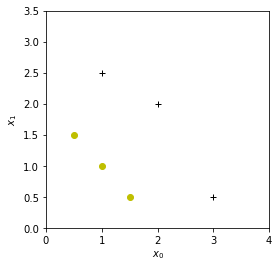

In [59]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Gradient Descent, Dot Product, Vectorization

In [60]:
def sigmoid(z):
    g = 1/(1+np.exp(-1*z)) 
    return g

In [118]:
def cost(X, y, w, b, sigmoid):
    m, n = X.shape
    loss = 0
    for i in range(m):
        f_i = sigmoid(np.dot(w,X[i,:])+b)
        loss = loss + -y[i]*np.log(f_i) - (1-y[i])*np.log(1-f_i)
        print(np.log(f_i), np.log(1-f_i))
    total_cost = loss/m
    return total_cost

In [124]:
np.log(0)

C:\Users\shanu\AppData\Local\Temp/ipykernel_27776/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [125]:
np.log(-1)

C:\Users\shanu\AppData\Local\Temp/ipykernel_27776/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [119]:
m, n = X.shape
initial_w = np.zeros(n)
initial_b = 0.
find_cost = cost(X, y, initial_w, initial_b, sigmoid)
print('Cost', find_cost)

-0.6931471805599453 -0.6931471805599453
-0.6931471805599453 -0.6931471805599453
-0.6931471805599453 -0.6931471805599453
-0.6931471805599453 -0.6931471805599453
-0.6931471805599453 -0.6931471805599453
-0.6931471805599453 -0.6931471805599453
Cost 0.6931471805599453


## Check the equations above and trace where each of the steps of Gradient descent is happening

In [120]:
def gradient(X, y, w, b,sigmoid): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           
    dj_db = 0.

    for i in range(m):
        f_i = sigmoid(np.dot(X[i],w) + b)          
        diff_i  = f_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (diff_i * X[i,j] )     
        dj_db = dj_db + diff_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw

In [121]:
w_initial = np.array([2.,3.])
b_initial = 1.
dj_db, dj_dw = gradient(X, y, w_initial, b_initial,sigmoid)
print(f"dj_db: {dj_db}" )
print(f"dj_dw: {dj_dw.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


## This function is where gradient descent happens...it calls the functions above for doing various pieces of the algorithm

In [122]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters,sigmoid): 
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    
    for i in range(num_iters):

        # Calculate the gradient
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in,sigmoid)   

        # Update w,b
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        cost =  cost_function(X, y, w_in, b_in,sigmoid)
        J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% 2000 == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history

In [123]:
np.random.seed(1)

#Play around by modifying the initial weight and bias
# Does the loss explode and lead to number overflow if you start with very very high values?
initial_w = np.array([102020200.,10.])
initial_b = 100.

# Some gradient descent settings
iterations = 100000
alpha = 0.1

w,b, J_history = gradient_descent(X ,y, initial_w, initial_b, 
                                   cost, gradient, alpha, iterations, sigmoid)

C:\Users\shanu\AppData\Local\Temp/ipykernel_27776/4123386247.py:6: RuntimeWarning: divide by zero encountered in log
  loss = loss + -y[i]*np.log(f_i) - (1-y[i])*np.log(1-f_i)
C:\Users\shanu\AppData\Local\Temp/ipykernel_27776/4123386247.py:7: RuntimeWarning: divide by zero encountered in log
  print(np.log(f_i), np.log(1-f_i))
C:\Users\shanu\AppData\Local\Temp/ipykernel_27776/4123386247.py:6: RuntimeWarning: invalid value encountered in multiply
  loss = loss + -y[i]*np.log(f_i) - (1-y[i])*np.log(1-f_i)


0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
Iteration    0: Cost      nan   
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
Iteration 8000: Cost      nan   
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
Iteration 14000: Cost      nan   
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0.0 -inf
0

KeyboardInterrupt: 

In [126]:
w,b

(array([ 1.020152e+08, -4.990000e+03]), -4900.000000009057)

## Once we get the final values of w and b after learning, we can use it to draw the decision boundary (for logistic regression)

In [113]:
def plot_decision_boundary(w, b, X, y):
     
    plot_data(X[:, 0:2], y)
    
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
    plt.plot(plot_x, plot_y, c="b")
        

In [114]:
w,b

(array([0.04744911, 0.03126819]), -0.0014924742767851256)

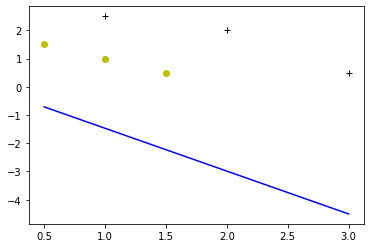

In [115]:
plot_decision_boundary(w, b, X, y)

In [100]:
w1 = array([1090411349, 0.73587543])
b1 = -2.33371631

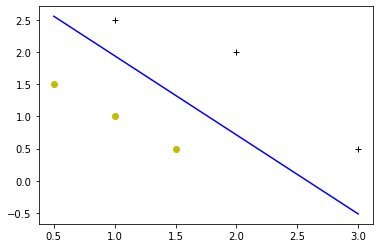

In [101]:
plot_decision_boundary(w1, b1, X, y)

In [102]:
y

array([0, 0, 0, 1, 1, 1])

In [103]:
sigmoid(np.dot(X,w) +b) > 0.5

array([False, False, False,  True,  True,  True])

## Polynomial Regression

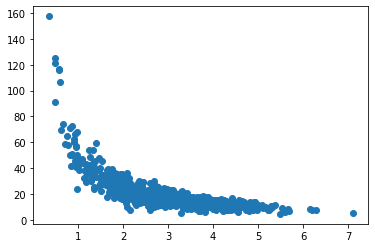

In [127]:
#%matplotlib inline
from pylab import *

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

In [146]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

# Modify the last parameter (degree) to see how the fit changes and when overfitting happens
p4 = np.poly1d(np.polyfit(x, y, 12))

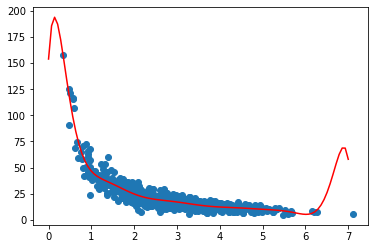

In [147]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


When do you see overfitting happen?